# Buckinghorse forced with 4km WRF

In [1]:
%matplotlib inline 
import matplotlib.pyplot as plt
import pysumma as ps
import xarray as xr
import pandas as pd
import numpy as np
# !pip install geopandas

In [2]:
buck = xr.open_dataset('./forcings/buck_wrf_2016.nc')
buck

<xarray.Dataset>
Dimensions:     (time: 7177, hru: 1)
Coordinates:
  * time        (time) datetime64[ns] 2015-10-01 ... 2016-07-26
Dimensions without coordinates: hru
Data variables:
    airtemp     (time, hru) float64 ...
    spechum     (time, hru) float64 ...
    pptrate     (time, hru) float64 ...
    SWRadAtm    (time, hru) float64 ...
    LWRadAtm    (time, hru) float64 ...
    windspd     (time, hru) float64 ...
    airpres     (time, hru) float64 ...
    gap_filled  (time, hru) float64 ...
    data_step   float64 ...
    hruId       (hru) int32 ...

In [17]:
for var in buck.data_vars:
    print(buck[var].isnull().sum())
    break

<xarray.DataArray 'airtemp' ()>
array(11)


In [22]:
np.where(np.isnan(buck['airtemp'].values))

(array([2069, 2070, 2071, 2072, 2073, 2074, 2075, 2076, 2077, 2078, 2079]),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]))

In [23]:
buck['airtemp'][2069,0]

<xarray.DataArray 'airtemp' ()>
array(nan)
Coordinates:
    time     datetime64[ns] 2015-12-26T05:00:00
Attributes:
    units:      K
    long_name:  Air temperature

(16745.0, 16747.0)

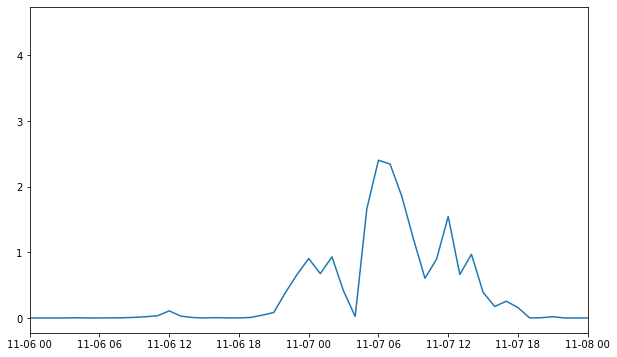

In [3]:
buck = xr.open_dataset('./forcings/buck_wrf_2016.nc')
plt.figure(figsize=(10,6))
plt.plot(buck.time, buck.pptrate)
plt.xlim(np.datetime64('2015-11-06'),np.datetime64('2015-11-08'))
# buck

(16745.0, 16747.0)

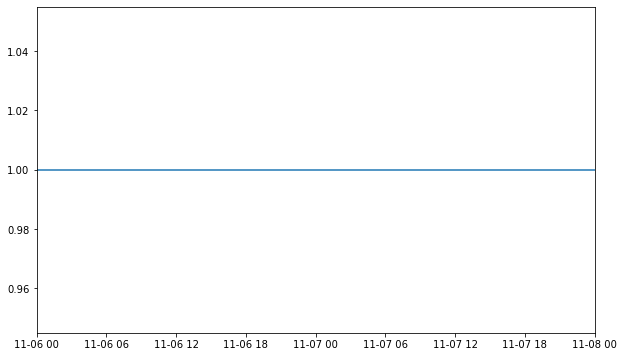

In [4]:
buck = xr.open_dataset('./forcings/buck_wrf_2016.nc')
plt.figure(figsize=(10,6))
plt.plot(buck.time, buck.gap_filled.values.reshape(7177,1))
plt.xlim(np.datetime64('2015-11-06'),np.datetime64('2015-11-08'))

In [5]:

buck['gap_filled'] = buck['gap_filled'].T
buck

<xarray.Dataset>
Dimensions:     (time: 7177, hru: 1)
Coordinates:
  * time        (time) datetime64[ns] 2015-10-01 ... 2016-07-26
Dimensions without coordinates: hru
Data variables:
    airtemp     (time, hru) float64 ...
    spechum     (time, hru) float64 ...
    pptrate     (time, hru) float64 ...
    SWRadAtm    (time, hru) float64 ...
    LWRadAtm    (time, hru) float64 ...
    windspd     (time, hru) float64 ...
    airpres     (time, hru) float64 ...
    gap_filled  (hru, time) float64 1.0 1.0 1.0 1.0 1.0 ... 1.0 1.0 1.0 1.0 1.0
    data_step   float64 ...
    hruId       (hru) int32 ...

In [6]:
# buck.to_netcdf('./forcings/buck_wrf_2016.nc',
                        # encoding = {"time":
                                        # {'dtype' : 'float64',
                                         # 'units' : 'hours since 1990-01-01 00:00:00',
                                         # 'calendar' : 'standard'}})

In [7]:
len(buck.pptrate.shape)

2

In [8]:
'''for var in buck.data_vars:
    if len(buck[var].shape) == 2:
        plt.figure(figsize=(10,6))
        print(var)
        print(buck.time.shape)
        print(buck[var].shape)
        plt.plot(buck.time, buck[var])
        plt.xlim(np.datetime64('2015-11-06'),np.datetime64('2015-11-08'))'''

"for var in buck.data_vars:\n    if len(buck[var].shape) == 2:\n        plt.figure(figsize=(10,6))\n        print(var)\n        print(buck.time.shape)\n        print(buck[var].shape)\n        plt.plot(buck.time, buck[var])\n        plt.xlim(np.datetime64('2015-11-06'),np.datetime64('2015-11-08'))"

In [9]:
executable = 'summa.exe'
filemanager = '/home/jovyan/data/buckinghorse/settings/file_manager_buck.txt'

In [10]:
s = ps.Simulation(executable, filemanager)

start = '2015-10-01 00:00'
end = '2016-06-01 00:00'
s.manager['simStartTime'] = start
s.manager['simEndTime'] = end

s.decisions['snowDenNew'] = 'hedAndPom'

# Add in some additional variables so we can demonstrate plotting capabilities
output_settings = {'period': 1, 'instant': 1, 'sum': 0, 
              'mean': 0, 'variance': 0, 'min': 0, 'max': 0}
layer_vars = ['mLayerTemp', 'mLayerDepth', 'mLayerHeight',
              'mLayerLiqFluxSoil', 'mLayerVolFracIce', 'mLayerVolFracLiq', 
              'mLayerVolFracWat','mLayerMatricHead', 'iLayerHeight', 'scalarSnowDepth', 'nSnow']

# Create the new variables
for var in layer_vars:
    s.output_control[var] = output_settings

# Ensure all variables have the same statistics
all_vars = set(layer_vars + [o.name for o in s.output_control.options])
for var in all_vars:
    s.output_control[var] = output_settings

In [11]:
s.decisions['snowIncept'] = 'stickySnow'
s.decisions

In [12]:
s.run('local', run_suffix='_wrf2016')
print(s.stdout)

file_suffix is '_wrf2016'.
file_master is '/home/jovyan/data/buckinghorse/settings/.pysumma/_wrf2016/file_manager_buck.txt'.
   1 controlVersion: SUMMA_FILE_MANAGER_V3.0.0
   2 simStartTime: 2015-10-01 00:00
   3 simEndTime: 2016-06-01 00:00
   4 tmZoneInfo: localTime
   5 settingsPath: /home/jovyan/data/buckinghorse/settings/.pysumma/_wrf2016/
   6 forcingPath: /home/jovyan/data/buckinghorse/forcings/
   7 outputPath: /home/jovyan/data/buckinghorse/output/
   8 decisionsFile: decisions.txt
   9 outputControlFile: output_control.txt
  10 globalHruParamFile: ../params/local_param_info.txt
  11 globalGruParamFile: ../params/basin_param_info.txt
  12 attributeFile: ../params/local_attributes.nc
  13 trialParamFile: ../params/parameter_trial.nc
  14 forcingListFile: ../forcings/forcing_file_list.txt
  15 initConditionFile: ../params/initial_conditions.nc
  16 outFilePrefix: template_output
  17 vegTableFile: VEGPARM.TBL
  18 soilTableFile: SOILPARM.TBL
  19 generalTableFile: GENPARM.TBL
  

In [13]:
print(s.stderr)

STOP 1



In [14]:
s.output


RuntimeError: There was an error during the simulation! Print the `stdout` and `stderr` for more information.

In [ ]:
plt.figure(figsize=(10,6))
s.output['scalarSWE'].plot()


In [ ]:
s_2layer = ps.Simulation(executable, filemanager)
s_2layer.manager['simStartTime'] = start
s_2layer.manager['simEndTime'] = end
s_2layer.decisions['snowLayers'] = 'CLM_2010'
s_2layer.decisions['alb_method'] = 'varDecay'

# Create the new variables
for var in layer_vars:
    s_2layer.output_control[var] = output_settings

# Ensure all variables have the same statistics
all_vars = set(layer_vars + [o.name for o in s_2layer.output_control.options])
for var in all_vars:
    s_2layer.output_control[var] = output_settings

s_2layer.global_hru_params['zminLayer3'] = 100.0000
s_2layer.global_hru_params['zminLayer4'] = 100.0000
s_2layer.global_hru_params['zminLayer5'] = 100.0000
s_2layer.global_hru_params['zmaxLayer2_lower'] = 1000.0000
s_2layer.global_hru_params['zmaxLayer3_lower'] = 1000.0000
s_2layer.global_hru_params['zmaxLayer4_lower'] = 1000.0000
s_2layer.global_hru_params['zmaxLayer2_upper'] = 1000.0000
s_2layer.global_hru_params['zmaxLayer3_upper'] = 1000.0000
s_2layer.global_hru_params['zmaxLayer4_upper'] = 1000.0000

In [ ]:
s_2layer.run('local', run_suffix='_2layer')

In [ ]:
'''import pysumma.plotting as psp

depth = s.output.isel(hru=0)['iLayerHeight']
temp = s.output.isel(hru=0)['mLayerTemp']
frac_wat = s.output.isel(hru=0)['mLayerVolFracWat']



psp.layers(frac_wat, depth, colormap='viridis', plot_soil=False, plot_snow=True)
s.output['scalarSnowDepth'].plot(color='red', linewidth=2)
plt.title('Buckinghorse Snow Depth and Temperature (Sep. 2018 - Aug. 2019)')
#plt.colorbar(temp, label='Snow Temperature [K]')
plt.xlabel('Date')
plt.ylabel('Snow Depth [m]')
plt.grid(ls='--', alpha=0.5)'''

In [ ]:
s_clm = ps.Simulation(executable, filemanager)

# Shorten the simulation length
s_clm.manager['simStartTime'] = start
s_clm.manager['simEndTime'] = end

# Create the new variables
for var in layer_vars:
    s_clm.output_control[var] = output_settings

# Ensure all variables have the same statistics
all_vars = set(layer_vars + [o.name for o in s_clm.output_control.options])
for var in all_vars:
    s_clm.output_control[var] = output_settings

In [ ]:
'''s_clm.run('local', run_suffix='_clm')
print(s_clm.status)'''

In [ ]:
'''s_clm.output['scalarSWE'].plot()'''

In [ ]:
'''depth = s_clm.output.isel(hru=0)['iLayerHeight']
temp = s_clm.output.isel(hru=0)['mLayerTemp']
frac_wat = s_clm.output.isel(hru=0)['mLayerVolFracWat']

psp.layers(frac_wat, depth, colormap='viridis', plot_soil=True, plot_snow=True, add_colorbar=True)
s_clm.output['scalarSnowDepth'].plot(color='red', linewidth=2)

plt.title(('Healy Neon Snow Depth and Temperature',start, 'to', end))
#plt.savefig("plots/prr_clm_allyrs_tempdepth.png")'''

In [ ]:
df = pd.read_csv('processing/buck_swe.txt')
df['Date'] = pd.to_datetime(df.Date)
df['SWE'] = df['SWE']*25.4

In [ ]:
mdl = xr.open_dataset('output/template_output_unmodified_timestep.nc')
mdl = mdl.resample(time='1D').interpolate('linear')

thin1 = xr.open_dataset('output/template_output_2layer_timestep.nc')
thin1 = thin1.resample(time='1D').interpolate('linear')

mprecip = xr.open_dataset('output/template_output_modprecip_timestep.nc')
mprecip = mprecip.resample(time='1D').interpolate('linear')

mrad = xr.open_dataset('output/template_output_modRad_timestep.nc')
mrad = mrad.resample(time='1D').interpolate('linear')

warm = xr.open_dataset('output/template_output_1K_timestep.nc')
warm = warm.resample(time='1D').interpolate('linear')

In [ ]:
# Read in Snowmodel Buckinghorse SWE
sm = xr.open_dataset('processing/Buckinghorse_SM_WRF.nc')
sm = sm.resample(time='1D').interpolate('linear')

# Define the new date range
new_date_range = pd.date_range('2018-09-05', periods=361)

# Change the date range using sel
sm = sm.sel(time=new_date_range)
sm

In [ ]:
# Calculate RMSE of Observed vs. Modeled SWE
import sklearn
from sklearn.metrics import mean_squared_error

rmse1 = sklearn.metrics.mean_squared_error(df.SWE, mdl.scalarSWE, squared=False)
rmse2 = sklearn.metrics.mean_squared_error(df.SWE, thin.scalarSWE, squared=False)
rmse3 = sklearn.metrics.mean_squared_error(df.SWE, sm.swed*1000/2, squared=False)
rmse4 = sklearn.metrics.mean_squared_error(df.SWE, mprecip.scalarSWE, squared=False)
rmse5 = sklearn.metrics.mean_squared_error(df.SWE, mrad.scalarSWE, squared=False)
rmse6 = sklearn.metrics.mean_squared_error(df.SWE, warm.scalarSWE, squared=False)
rmse7 = sklearn.metrics.mean_squared_error(df.SWE, thin1.scalarSWE, squared=False)

In [ ]:
plt.figure(figsize=(15,6))
# plt.plot(mdl.time, mdl.scalarSWE, label='SUMMA\nRMSE [mm] - '+str(np.round(rmse1,2)), color='cadetblue')
# plt.plot(mprecip.time, mprecip.scalarSWE, label='SUMMA Modified Precip\nRMSE [mm] - '+str(np.round(rmse4,2)), 
         # color='cadetblue')
# plt.plot(mrad.time, mrad.scalarSWE, label='SUMMA Modified Precip \n& Spring Radiation\nRMSE [mm] - '+str(np.round(rmse5,2)), 
        # color='cadetblue', ls='--')
# plt.plot(warm.time, warm.scalarSWE, label='SUMMA All Modifications\nRMSE [mm] - '+str(np.round(rmse6,2)), 
        # color='cadetblue', ls='dotted')
plt.plot(thin.time, thin.scalarSWE, label='SUMMA CLM Thin 2-layer\nRMSE [mm] - '+str(np.round(rmse2,2)), 
         color='cadetblue', ls='-.')
# plt.plot(thin1.time, thin1.scalarSWE, label='SUMMA CLM Thin 2-layer\nRMSE [mm] - '+str(np.round(rmse7,2)), 
         # color='cadetblue', ls='-.')
plt.plot(sm.time, sm.swed*1000/2, label='SnowModel\nRMSE [mm] - '+str(np.round(rmse3,2)), color='darkgreen')
plt.plot(df.Date, df.SWE, label='Buckinghorse SNOTEL', color='sienna')
plt.ylabel('Snow Water Equivalent [mm]')
plt.title('Buckinghorse Snow Water Equivalent')
plt.grid(ls='--', alpha=0.5)
plt.legend()

plt.savefig('./processing/plots/buck_summa_swe_final.png', dpi=200)

In [ ]:
mdl.scalarSWE.max()

In [ ]:
df.SWE.max()